In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "FABIA"
tool_suffix = "Fabia"
n_runs = 10

parameters = (("alpha",[0.001,0.005,0.01,0.05,0.1,0.5]),
              ("spl",[0,0.25,0.5,0.75,1,1.5,2]),
              ("spz",[0,0.25,0.5,0.75,1,1.5,2]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [4]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "alpha=0.05.spl=0.spz=0.5"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_biclust(bic_file_path,n_runs=n_runs)[0]
        print(g,"x",s,len(bics))

5 x 10 10
5 x 20 10
5 x 50 10
5 x 100 10
10 x 10 10
10 x 20 10
10 x 50 10
10 x 100 10
20 x 10 10
20 x 20 10
20 x 50 10
20 x 100 10
50 x 10 10
50 x 20 10
50 x 50 10
50 x 100 10
100 x 10 10
100 x 20 10
100 x 50 10
100 x 100 10


In [6]:
true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/FABIA/alpha=0.05.spl=0.spz=0.5/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.Fabia.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.976388125545388
1 0.976388125545388
2 0.976388125545388
3 0.976388125545388
4 0.976388125545388
5 0.976388125545388
6 0.976388125545388
7 0.976388125545388
8 0.976388125545388
9 0.976388125545388


In [7]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=10,10.overlap=T

../simulated_datasets/results/FABIA/alpha=0.001.spl=0.5.spz=0.75/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=0/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=0.25/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=0.5/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=0.75/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=1/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=1.5/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=2/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=1.spz=0.25/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=1.spz=0.75/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=1.5.spz=0.25/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=1.5.spz=0.75/ does not found.
../simulated_datasets/re

Total combinations: 272
Total combinations: 272
[(0.05, 0.5, 0.75) (0.05, 0.5, 1.0) (0.05, 0.25, 0.0) (0.05, 0.25, 0.25)
 (0.05, 0.75, 1.0) (0.05, 0.25, 0.75) (0.05, 0.25, 0.5) (0.05, 0.5, 0.5)
 (0.05, 0.25, 1.0) (0.05, 0.5, 0.25) (0.1, 0.0, 0.75) (0.05, 0.5, 0.0)
 (0.05, 1.0, 1.0) (0.1, 0.0, 0.5) (0.05, 0.75, 0.75) (0.1, 0.25, 1.0)
 (0.05, 0.0, 0.0) (0.05, 0.0, 0.25) (0.05, 0.0, 0.75) (0.01, 1.5, 0.75)]
Top 20 paramter combinations


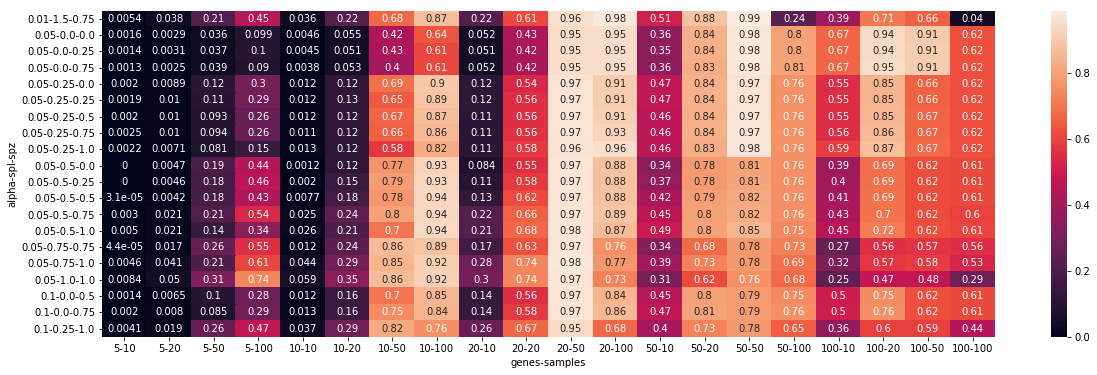

In [9]:
params = ["alpha","spl","spz"]
plot_file = img_outdir+"/" + tool_suffix+".J_rel.heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".J_rel.heatmap.tsv"

heatmap = plot_performance_heatmap(results,params,top=20,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [10]:
parameters

(('alpha', [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]),
 ('spl', [0, 0.25, 0.5, 0.75, 1, 1.5, 2]),
 ('spz', [0, 0.25, 0.5, 0.75, 1, 1.5, 2]))

In [11]:
default_params = (0.01,0,0.5)

In [12]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 54400 runs considered

with Optimal parameters (Relevance --> max):
	alpha=0.05;
	spl=0.5;
	spz=0.75;
	Max. avg. Relevance: 0.536 ± 0.312
	Max. avg. Recovery: 0.539 ± 0.31
	Max. avg. n_biclusters: 10.165 ± 0.434
With Default parameters:
	alpha=0.01;
	spl=0;
	spz=0.5;
	avg. Relevance: 0.38 ± 0.364
	avg. Recovery: 0.383 ± 0.362
	avg. n_biclusters: 10.0 ± 0.0


Relevance                                      Recovery  \
                     mean       std count       max       min      mean   
alpha spl  spz                                                            
0.050 0.50 0.75  0.535774  0.312299   200  0.973989  0.000697  0.538837   
           1.00  0.521055  0.318401   200  0.975950  0.001890  0.523692   
      0.25 0.00  0.520487  0.343763   200  0.970538  0.000816  0.521326   
           0.25  0.519000  0.343020   200  0.970538  0.000956  0.519857   
      0.75 1.00  0.517193  0.297516   200  0.978658  0.000948  0.523744   
      0.25 0.75  0.516847  0.346661   200  0.972538  0.001243  0.517828   
           0.50  0.516352  0.345711   200  0.970538  0.000982  0.517265   
      0.50 0.50  0.511793  0.325380   200  0.970214  0.000000  0.525657   
      0.25 1.00  0.509140  0.352314   200  0.976463  0.001245  0.510420   
      0.50 0.25  0.505856  0.328598   200  0.973136  0.000000  0.522233   
0.100 0.00 0.75  0.501734  0.323617   200  0.970361  0.000424  0.503212   
0.050 0.50 0.00  0.497598  0.330353   200  0.973136  0.000000  0.515638   
      1.00 1.00  0.495294  0.297721   200  0.973847  0.000738  0.505799   
0.100 0.00 0.50  0.494504  0.321072   200  0.970361  0.000704  0.500839   
0.050 0.75 0.75  0.492259  0.305919   200  0.974883  0.000000  0.515700   
0.100 0.25 1.00  0.489203  0.277559   200  0.946208  0.001380  0.500011   
0.050 0.00 0.00  0.488298  0.376329   200  0.982271  0.001115  0.489458   
           0.25  0.486358  0.376089   200  0.982271  0.000893  0.487637   
           0.75  0.485584  0.377453   200  0.982271  0.000999  0.486901   
0.010 1.50 0.75  0.485303  0.342237   200  0.990232  0.000559  0.490555   
           0.00  0.485082  0.356113   200  0.994248  0.000000  0.499708   
0.100 0.00 1.00  0.484518  0.332948   200  0.972175  0.001154  0.488156   
0.050 0.00 0.50  0.483993  0.376620   200  0.982271  0.000990  0.485510   
0.100 0.00 0.25  0.482100  0.323874   200  0.962733  0.000000  0.495183   
0.005 2.00 0.25  0.482070  0.350898   200  0.992155  0.000000  0.493755   
           0.50  0.481486  0.345273   200  0.994155  0.000574  0.489304   
0.050 0.00 1.00  0.480546  0.381450   200  0.982271  0.001163  0.482201   
0.010 2.00 0.75  0.479694  0.336953   200  0.995238  0.000170  0.490789   
      1.50 0.50  0.479590  0.350866   200  0.989486  0.000322  0.488962   
           0.25  0.475509  0.354816   200  0.994248  0.000000  0.489797   
...                   ...       ...   ...       ...       ...       ...   
0.500 1.50 0.25  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.00  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      0.25 0.25  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      1.50 0.50  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.75  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      1.00 0.50  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      2.00 0.00  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.25  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.50  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.75  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      1.00 0.75  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.00  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.25  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      0.25 0.50  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.75  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           1.00  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      0.00 1.00  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.75  0.000000  0.000000   200  0.000000  0.000000  0.000000   
      0.50 0.00  0.000000  0.000000   200  0.000000  0.000000  0.000000   
           0.25  0.000000  0.000000   200